In [1]:
import input as i
import alg_google as a_g
import alg as a
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

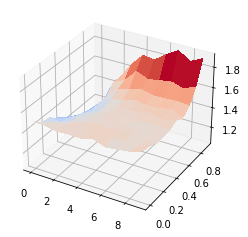

In [2]:
'''DPOA'''

# X = np.arange(0,1,0.1)
# Y = np.arange(0,100,1)
w = np.arange(0,1,0.1)
std_list= np.arange(0,10,1)
Z = []
Z1 = []
# w, std_list = np.meshgrid(X, Y)
# w = 0.3
# std_list = np.arange(0,100,1)
repeat = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,omega in enumerate(w):
    for id,std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            
            alg = a.DPOA(ins, omega)
            opt = a.OPT(ins)
            r_ratio[id, j] = alg/opt
    avg_ratio = np.mean(r_ratio, axis=1)
    Z.append(avg_ratio)

Z = np.array(Z)
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(std_list,w)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

r_ratio1 = np.zeros((len(std_list), repeat))
for idx,omega in enumerate(w):
    for id,std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            
            alg = a_g.DPOA_google(ins, omega)
            opt = a.OPT(ins)
            r_ratio1[id, j] = alg/opt
    avg_ratio = np.mean(r_ratio1, axis=1)
    Z1.append(avg_ratio)

# print(Z1)
    

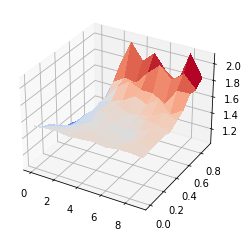

In [3]:
'''RPOA'''

w = np.arange(0,1,0.1)
std_list= np.arange(0,10,1)
Z2 = []
Z3 = []
alg_reps = 50
repeat = 100

r_ratio2 = np.zeros((len(std_list), repeat))
r_ratio3 = np.zeros((len(std_list), repeat))


for idx,omega in enumerate(w):
    for id, std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            alg_total = 0
            for l in range(alg_reps):
                alg_total += a.RPOA(ins, omega)
            alg_avg = alg_total/alg_reps
            opt = a.OPT(ins)
            r_ratio2[id, j] = alg_avg/opt
    avg_ratio = np.mean(r_ratio2, axis=1)
    Z2.append(avg_ratio)
    
for idx,omega in enumerate(w):
    for id, std in enumerate(std_list):
        for j in np.arange(repeat):
            ins = i.Instance(B=50, predictor_std=std)
            alg_total = 0
            for l in range(alg_reps):
                alg_total += a_g.RPOA_google(ins, omega)
            alg_avg = alg_total/alg_reps
            opt = a.OPT(ins)
            r_ratio3[id, j] = alg_avg/opt
    avg_ratio = np.mean(r_ratio3, axis=1)
    Z3.append(avg_ratio)

Z2 = np.array(Z2)
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(std_list,w)

surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [4]:
np.savetxt('output.csv',X,delimiter=",")
np.savetxt('output1.csv',Y,delimiter=",")
np.savetxt('output2.csv',Z,delimiter=",")
np.savetxt('output3.csv',Z1,delimiter=",")
np.savetxt('output4.csv',Z2,delimiter=",")
np.savetxt('output5.csv',Z3,delimiter=",")

In [5]:
Z2

array([[1.53708905, 1.55476551, 1.55920784, 1.53956829, 1.55374387,
        1.56650067, 1.54346653, 1.56468259, 1.56811946, 1.55140601],
       [1.44460942, 1.50315405, 1.52067687, 1.54822348, 1.56876103,
        1.55301141, 1.55656012, 1.54557361, 1.58717455, 1.56075572],
       [1.40861657, 1.43044199, 1.47947938, 1.53676677, 1.53558288,
        1.54209456, 1.53665324, 1.52051975, 1.58889706, 1.57251036],
       [1.32374878, 1.34506438, 1.46115057, 1.49118512, 1.5636731 ,
        1.55559225, 1.51254895, 1.54062535, 1.60527513, 1.57804548],
       [1.22670609, 1.32272488, 1.4763266 , 1.54838495, 1.54582398,
        1.56540749, 1.55370701, 1.60953916, 1.58543679, 1.54975583],
       [1.19876997, 1.29509153, 1.44884873, 1.53178585, 1.60289572,
        1.52635036, 1.54660305, 1.58572036, 1.66495196, 1.60778461],
       [1.15636486, 1.2750636 , 1.47678833, 1.5309407 , 1.58042157,
        1.66593727, 1.60792026, 1.70463171, 1.56396262, 1.65952897],
       [1.09920196, 1.26140799, 1.4744092

In [6]:
Z3

[array([1.57530603, 1.5958279 , 1.57821128, 1.58066076, 1.59382741,
        1.59028145, 1.59073086, 1.5672539 , 1.57406892, 1.57171155]),
 array([1.57214003, 1.56901644, 1.59406036, 1.59757718, 1.57231851,
        1.57026998, 1.55541354, 1.59619154, 1.57710803, 1.5942026 ]),
 array([1.55496805, 1.55901771, 1.50455236, 1.53120392, 1.55881807,
        1.53921148, 1.57438319, 1.57315184, 1.61975816, 1.53182255]),
 array([1.54126929, 1.55186548, 1.53914172, 1.54850156, 1.53065569,
        1.52692172, 1.54073722, 1.48889497, 1.53621878, 1.52489178]),
 array([1.46991138, 1.49544996, 1.49439805, 1.51850452, 1.5049997 ,
        1.47910549, 1.55103682, 1.51880066, 1.48707826, 1.57536992]),
 array([1.41648323, 1.44015035, 1.46696576, 1.4246147 , 1.49918858,
        1.49703641, 1.46570432, 1.39392954, 1.4340391 , 1.46068821]),
 array([1.32211496, 1.4033993 , 1.35988347, 1.3640213 , 1.33276143,
        1.36034824, 1.34461116, 1.40376219, 1.33464377, 1.32102612]),
 array([1.33769531, 1.26187468, 1.